# SYDE 556/750 --- Assignment 2

**Student ID: 20772297**

_Note:_ Please include your numerical student ID only, do _not_ include your name.

_Note:_ Refer to the [PDF](https://github.com/tcstewar/syde556-f21/raw/master/assignments/assignment_02/syde556_assignment_02.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.


In [202]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']


# 1. Generating a random input signal

## 1.1 Band-limited white noise

**a) Time-domain signals.** Plot $x(t)$ for three randomly generated signals with $\texttt{limit}$ at $5$, $10$, and $20\,\mathrm{Hz}$. For each of these, $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$ and $\mathtt{rms}=0.5$.


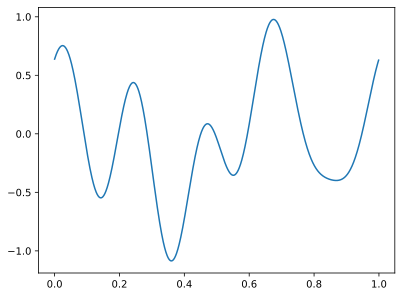

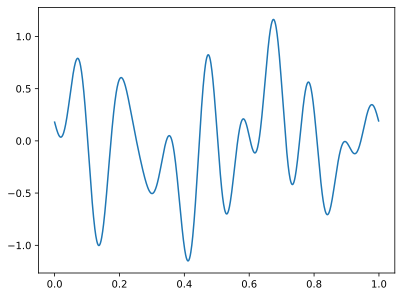

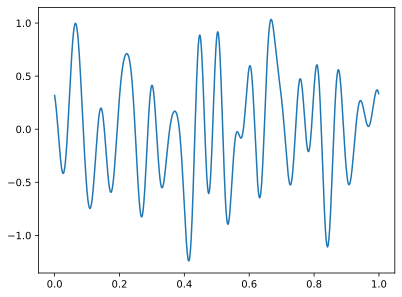

In [203]:
def generate_signal(T, dt, rms, limit, seed):
    np.random.seed(seed)
    N = int(T/dt)
    t = np.arange(N)*dt
    limit_rad = limit
    fs = np.fft.fftshift(np.fft.fftfreq(N, dt))
    t_signal_x = np.random.normal(0, 1, N)
    f_signal_X = np.fft.fft(t_signal_x)
    f_signal_X = np.fft.fftshift(f_signal_X)
    f_signal_X[np.abs(fs) > limit_rad] = 0
    t_signal_x = np.real(np.fft.ifft(np.fft.ifftshift(f_signal_X)))
    old_rms = np.sqrt(np.mean(t_signal_x**2))
    t_signal_x = t_signal_x*rms/old_rms
    f_signal_X = f_signal_X*rms/old_rms
    return t, t_signal_x, fs, f_signal_X


def plot_1_1():
    for limit in [5, 10, 20]:
        t, time_domain_signal, fs, freq_domain_signal = generate_signal(1, 0.001, 0.5, limit, 18945)
        plt.plot(t, time_domain_signal)
        plt.show()
plot_1_1()


**b) Average power spectrum.** Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients, or “power spectrum”) over $100$ signals generated with $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=10\,\mathrm{Hz}$ (of course, each of these 100 signals should have a different `seed`). The plot should have the $x$-axis labeled “$\omega$ in radians” and the average $|X|$ value for that $\omega$ on the $y$-axis.


(100, 4, 1000)


c:\Users\joshz\miniconda3\envs\syde556\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


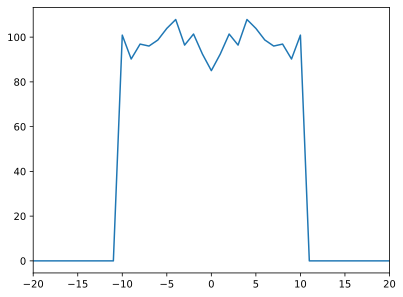

In [204]:
def plot_average_power_spectrum(T, dt, rms, limit, seed, num_signals=100):

    total = np.array([generate_signal(T, dt, rms, limit, seed+i)
                 for i in range(num_signals)])
    print(total.shape)
    f_signals = np.abs(total[:, 3,:])
    fs = np.mean(total[:,2,:],axis=0)
    avg_signal = np.mean(f_signals, axis=0)
    plt.plot(fs,avg_signal)
    plt.xlim(-20, 20)

plot_average_power_spectrum(1, 0.001, 0.5, 10, 18945)


## 1.2 Gaussian power spectrum noise


**a) Time-domain signals.** Plot $x(t)$ for three randomly generated signals with `bandwidth` at $5$, $10$, and $20\,\mathrm{Hz}$. For each of these, $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$ and $\mathtt{rms}=0.5$.


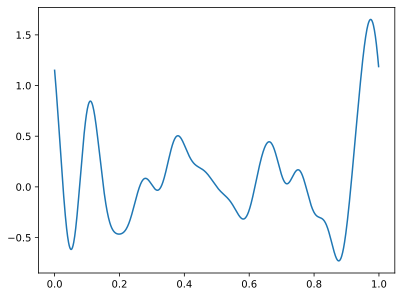

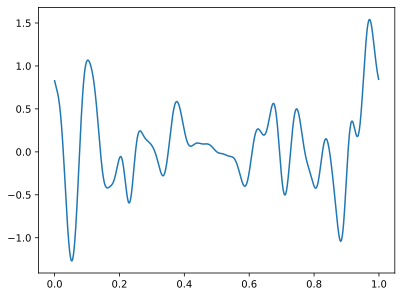

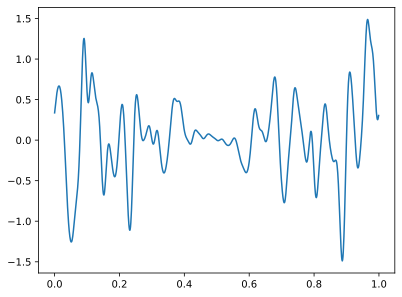

In [205]:
def generate_signal_smooth(T, dt, rms, bandwidth, seed):
    np.random.seed(seed)
    N = int(T/dt)
    t = np.arange(N)*dt
    #TODO do i need to convert limit to rads
    fs = np.fft.fftshift(np.fft.fftfreq(len(t), dt))
    sigma = np.exp(-fs[len(fs)//2:]**2/(2*bandwidth**2))
    f_real = np.random.normal(0, sigma, N//2)
    f_imag = np.random.normal(0, sigma, N//2)
    f_signal_X = f_real + 1j*f_imag
    f_signal_X = np.concatenate((f_signal_X, np.flip(np.conj(f_signal_X))))
    f_signal_x = np.fft.fftshift(f_signal_X)
    t_signal_x = np.fft.ifft(f_signal_X).real
    old_rms = np.sqrt(np.mean(t_signal_x**2))
    t_signal_x =t_signal_x/old_rms*rms
    f_signal_X=f_signal_X/old_rms*rms
    f_signal_X = np.fft.fftshift(f_signal_X)

    return t, t_signal_x, fs, f_signal_X

def plot_1_2():
    for bandwidth in [5, 10, 20]:
        t, time_domain_signal, fs, freq_domain_signal = generate_signal_smooth(1, 0.001, 0.5, bandwidth, 18945)
        plt.plot(t, time_domain_signal)
        plt.show()
plot_1_2()



**b) Average power spectrum.** Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients, or “power spectrum”) over $100$ signals generated with $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{bandwidth}=10$ (of course, each of these 100 signals should have a different `seed`). The plot should have the $x$-axis labeled “$\omega$ in radians” and the average $|X|$ value for that $\omega$ on the $y$-axis.


(100, 4, 1000)


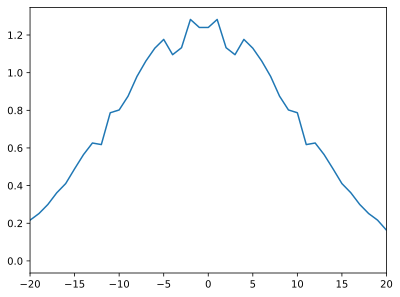

In [206]:
def plot_average_power_spectrum_bandwith(T, dt, rms, limit, seed, num_signals=100, bandwith=0.1):
    total = np.array([generate_signal_smooth(T, dt, rms, limit, seed+i)
                 for i in range(num_signals)])
    print(total.shape)
    f_signals = np.abs(total[:, 3,:])
    fs = np.mean(total[:,2,:],axis=0)
    avg_signal = np.mean(f_signals, axis=0)
    plt.plot(fs,abs(avg_signal))
    plt.xlim(-20, 20)

plot_average_power_spectrum_bandwith(1, 0.001, 0.5, 10, 18945, bandwith=10)


# 2. Simulating a spiking neuron

**a) Spike plots for constant inputs.** Plot the spike output for a constant input of $x=0$ over $1$ second. Report the number of spikes. Do the same thing for $x=1$. Use a time step of $\Delta t = 1\,\mathrm{ms}$ for the simulation.


high


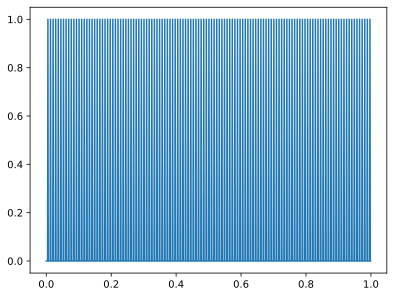

125.0
low


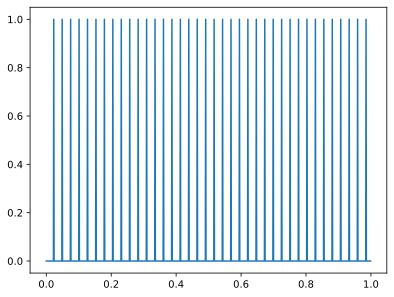

38.0


In [207]:
def LIF_firing_rate(J,tref=0.002,trc=0.02):
    return np.where(J>1,1/(tref - trc*np.log(1-1/J)),0)

def lif_diff(v,trc=0.02,tref=0.002):
    return 1/trc *(4.8-v) #the j here is constant because x is constant alpha plus jbias in this case

def get_spikes(x_input, dt=0.001, t0=0, tf=1,trc=0.02,tref=0.002,xmin=40,xmax=150,e=1):
    t = np.arange(t0, tf, dt)
    
    J_bias = (1 - np.exp((tref*xmin - 1)/(trc*xmin)))**-1
    if xmax == 0:
        alpha = J_bias + 1
    else:
        alpha = (1 - np.exp((tref*xmax - 1)/(trc*xmax)))**-1 - J_bias
    J_vals = alpha*x_input*e + J_bias


    volts = np.zeros(len(x_input))
    rasterplot = np.zeros(len(x_input))
    wait = 0
    for i,J  in enumerate(J_vals):
        if i == 0:
            volts[i] = 0 + dt*(J - 0)/trc
        elif wait>0:
            volts[i] = 0
            wait-=1
        elif volts[i-1] > 1:
            volts[i] = 0
            rasterplot[i] = 1
            wait = 2
        elif volts[i-1] < 0:
            volts[i] = 0

        
        else:
            volts[i] = volts[i-1] + dt*(J - volts[i-1])/trc
        
    return t, x_input , rasterplot , volts


def q2_a():
    x_in_high = np.ones(1000)
    x_in_low = np.zeros(1000)

    print("high")
    t,_,raster,_ = get_spikes(x_in_high,0.001)
    plt.plot(t,raster)
    plt.show()
    print(np.sum(raster))

    print("low")
    t,_,raster,_ = get_spikes(x_in_low,0.001)
    plt.plot(t,raster)
    plt.show()
    print(np.sum(raster))




q2_a()



**b) Discussion.** Does the observed number of spikes in the previous part match the expected number of spikes for $x=0$ and $x=1$? Why or why not? What aspects of the simulation would affect this accuracy?


The time step can affect the simulation


**c) Spike plots for white noise inputs.** Plot the spike output for $x(t)$ generated using your function from part 1.1. Use $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=30\,\mathrm{Hz}$. Overlay on this plot $x(t)$.


In [208]:
def turn_one_to_index(x):
    for i in range(len(x)):
        if x[i] == 1:
            x[i] = i
    return x

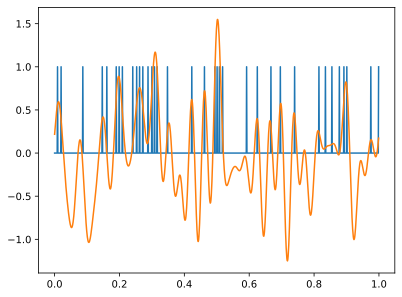

36.0


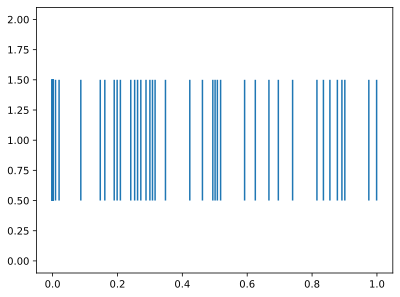

In [209]:
def q2_c():
    t,x_t,fs,f_w= generate_signal(1,1e-3,0.5,30,100)
    t,x,spikes,_ = get_spikes(x_t,0.001)
    plt.plot(t,spikes)
    plt.plot(t,x)
    plt.show()
    print(np.sum(spikes))
    plt.eventplot(turn_one_to_index(spikes)*0.001)

q2_c()

**d) Voltage over time.** Using the same $x(t)$ signal as in part _c)_, plot the neuron's voltage over time for the first $0.2$ seconds, along with the spikes over the same time.


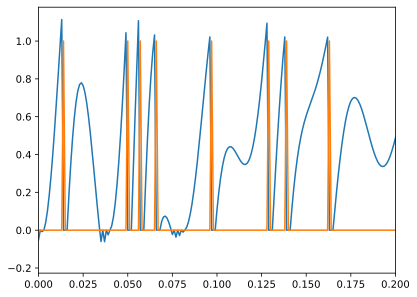

In [210]:
def q2_c():
    t,x_t,fs,f_w= generate_signal(1,1e-3,0.5,30,123)
    t,x,spikes,volts = get_spikes(x_t,0.001,xmin=40,xmax=150)


    plt.plot(t,volts)
    plt.plot(t,spikes)
    plt.xlim(0,0.2)
    plt.show()
    #TODO never input negative voltage, and spikes

q2_c()

**e) 🌟 Bonus question.** How could you improve this simulation (in terms of how closely the model matches actual equation) without significantly increasing the computation time? $0.5$ marks for having a good idea. Up to $1$ mark for actually implementing it and showing that it works.


✍ \<YOUR SOLUTION HERE\>


In [211]:
# Currently the simulation has to simulate every time step one at a time which means the simulation cant be parralelized if you could vectorize this operation like numpy likes than it could be sped up.


# 3. Simulating two spiking neurons

**a) Spike plots for constant inputs.** Plot $x(t)$ and the spiking output for $x(t)=0$ (both neurons should spike at about $40$ spikes per second), as well as (in a separate plot) $x(t)=1$ (one neuron should spike at $\approx 150$ spikes per second, and the other should not spike at all).


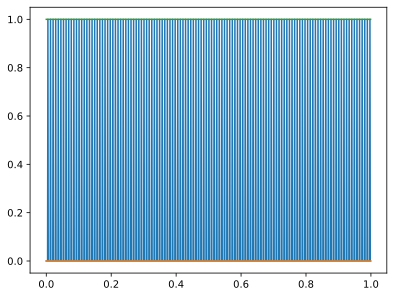

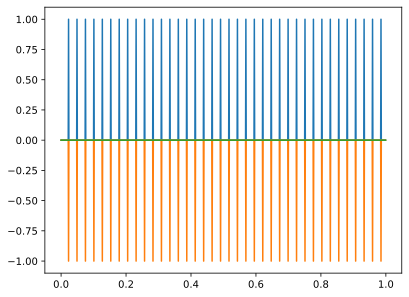

38.0


In [212]:
def q3_a():
    x_t = np.ones(1000)
    t,x,spikes,_ = get_spikes(x_t,0.001)
    t1,x1,spikes1,volts1 = get_spikes(x_t,0.001,xmin=40,xmax=0,e=-1)

    plt.plot(t,spikes)
    plt.plot(t1,-spikes1)
    plt.plot(t,x)
    plt.show()

    x_t = np.zeros(1000)
    t,x,spikes,_ = get_spikes(x_t,0.001)
    t1,x1,spikes1,volts1 = get_spikes(x_t,0.001,xmin=40,xmax=0,e=-1)

    plt.plot(t,spikes)
    plt.plot(t1,-spikes1)
    plt.plot(t,x)
    plt.show()
    print(np.sum(spikes))

q3_a()



**b) Spike plots for a sinusodial input.** Plot $x(t)$ and the spiking output for $x(t)=\frac{1}2 \sin(10 \pi t)$.


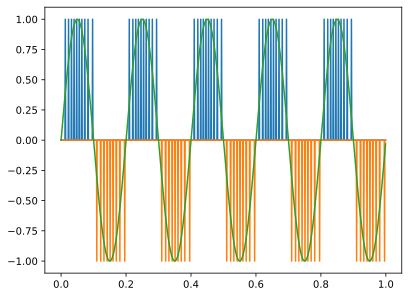

50.0


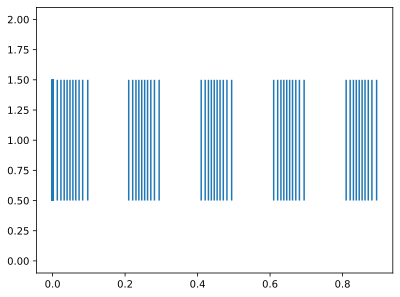

In [213]:
def q3_b():
    x_t = np.sin(2*np.pi*5*np.arange(0,1,0.001))
    t,x,spikes,_ = get_spikes(x_t,0.001)
    t1,x1,spikes1,volts1 = get_spikes(x_t,0.001,xmin=40,xmax=0,e=-1)

    plt.plot(t,spikes)
    plt.plot(t1,-spikes1)
    plt.plot(t,x)
    plt.show()
    print(np.sum(spikes))
    plt.eventplot(turn_one_to_index(spikes)*0.001)

q3_b()

**c) Spike plot for a white noise signal.** Plot $x(t)$ and the spiking output for a random signal generated with your function for question 1.1 with $\mathtt{T}=2\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=5\,\mathrm{Hz}$.


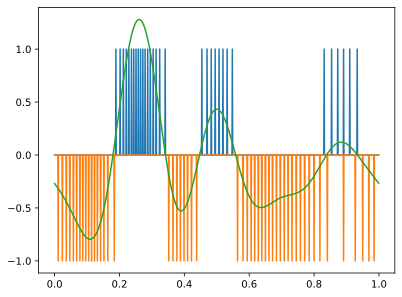

32.0


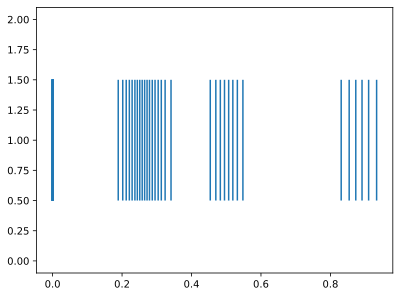

In [214]:
def q3_c():
    t,x_t,fs,f_w= generate_signal(1,1e-3,0.5,5,100) #TODO CHANGE TO 2s
    t,x,spikes,_ = get_spikes(x_t,0.001)
    t1,x1,spikes1,_ = get_spikes(x_t,0.001,e=-1)

    plt.plot(t,spikes)
    plt.plot(t1,-spikes1)
    plt.plot(t,x)
    plt.show()
    print(np.sum(spikes))

q3_c()


# 4. Computing an optimal filter


**a) Document the code.** Fill in comments where there are `# !`-signs in the Python code. Make sure that your comments (where this makes sense) describe the semantics of the code and do not just repeat what is obvious from the code itself. Run the function with what you wrote for part 3 above, so that it uses the spike signal generated in 3c).


In [215]:
def compute_optimal_filter(
    # Signal generated from your white noise generator
    x,
    # Fourier coefficients from your white noise generator
    X,
    # Spike train from the previous part
    spikes,
    # Time step size
    dt=1e-3
):

    # x and X should (effectively) be 1D-arrays
    assert x.ndim == 1 and X.ndim == 1
    assert x.shape[0] == X.shape[0]

    # get number of samples
    Nt = x.size

    # Make sure that "spikes" is a 2 x Nt array
    assert spikes.ndim == 2
    assert spikes.shape[0] == 2
    assert spikes.shape[1] == Nt

    # The total time of the signal is the number of time steps in the signal times the time step size
    T = Nt * dt

    # get time vector from -T/2 - T/2
    ts = np.arange(Nt) * dt - T / 2.0

    # get the equivalent frequency vector
    fs = np.arange(Nt) / T - Nt / (2.0 * T)

    # convert to radians
    omega = fs * 2.0 * np.pi

    # get a combined signed spike train from the two spike trains
    r = spikes[0] - spikes[1]

    # convert the spike train to a frequency domain representation and shift it to the center
    R = np.fft.fftshift(np.fft.fft(r))

    # calculate 1/sigma
    sigma_t = 25e-3

    # calculate the gaussian filter
    W2 = np.exp(-omega**2*sigma_t**2)

    # nomralize the gaussian filter so integral is 1
    W2 = W2 / sum(W2)

    # compute numerator of the optimal filter 
    CP = X*R.conjugate()

    # Filter noise by convolving with the gaussian filter
    WCP = np.convolve(CP, W2, 'same')

    # start calculating the denominator of the optimal filter by calculating the magnitude of R
    RP = R*R.conjugate()

    # filter noise by convolving with the gaussian filter
    WRP = np.convolve(RP, W2, 'same')

    # Absolute value of input signal
    XP = X*X.conjugate()

    # noise filtered absolute value of input signal in frequency domain
    WXP = np.convolve(XP, W2, 'same')

    # Compute frequency domain optimal filter
    H = WCP / WRP

    # compute the filter by taking the inverse fourier and taking the real part in the time domain
    h = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(H))).real

    # get a predicted frequency domain dignal by multiplying the filter in the frequency domain by the spike train in the frequency domain
    XHAT = H*R

    # take the inverse fourier transform of the predicted frequency domain signal for a time domain predicted input signal
    xhat = np.fft.ifft(np.fft.ifftshift(XHAT)).real

    return ts, fs, R, H, h, XHAT, xhat, XP, WXP
t,x_t,fs,f_w= generate_signal(1,1e-3,0.5,5,100)
# x_t = np.ones(1000)
t,x,spikes,_ = get_spikes(x_t,0.001)
t1,x1,spikes1,volts1 = get_spikes(x_t,0.001,e=-1)
spikes_full = np.vstack((spikes,spikes1))
ts, fs, R, H, h, XHAT, xhat, XP, WXP = compute_optimal_filter(x_t,f_w,spikes_full)

**b) Optimal filter.** Plot the time and frequency plots of the optimal filter for the signal you generated in question 3c). Make sure to use appropriate limits for the $x$-axis.


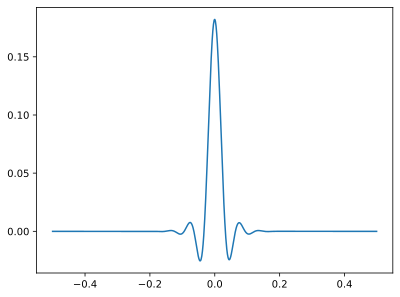

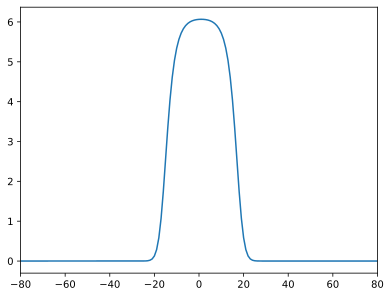

In [216]:
def q4_b():
    plt.plot(ts,h)
    plt.show()
    plt.plot(fs,H)
    plt.xlim(-80,80)
    plt.show()

q4_b()

**c) Decoded signal.** Plot the $x(t)$ signal, the spikes, and the decoded $\hat x(t)$ value for the signal from 3c).


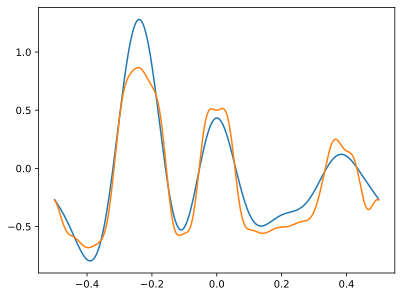

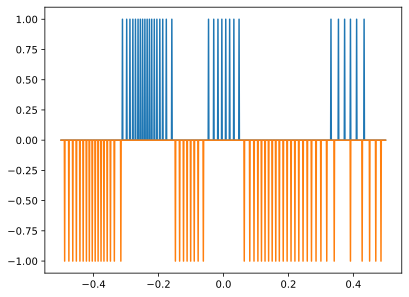

In [217]:
def q4_b():
    plt.plot(ts,x_t)
    plt.plot(ts,xhat)
    plt.show()
    plt.plot(ts,spikes_full[0])
    plt.plot(ts,-spikes_full[1])


q4_b()

**d) Power spectra.** Plot the signal $|X(\omega)|$, spike response $|R(\omega)|$, and filtered signal $|\hat X(\omega)|$ power spectra for the signal from 3c).


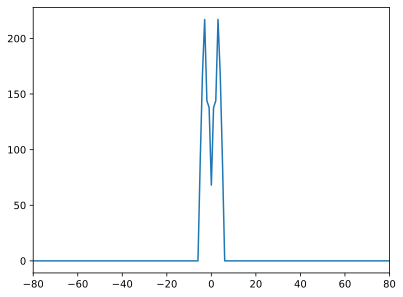

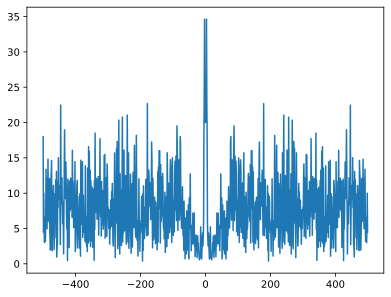

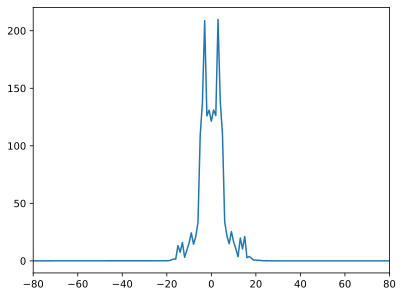

In [227]:
def q4_d():
    
    plt.plot(fs,np.abs(f_w))
    plt.xlim(-80,80)
    plt.show()
    plt.plot(fs,np.abs(R))
    plt.show()
    plt.plot(fs,np.abs(XHAT))
    plt.xlim(-80,80)

q4_d()


**e) Discussion.** How do these spectra relate to the optimal filter?


✍ \<YOUR SOLUTION HERE\>


**f) Filter for different signal bandwidths.** Plot the optmial filter $h(t)$ in the time domain when filtering spike trains for white noise signals with different `limit` values of $2\,\mathrm{Hz}$, $10\,\mathrm{Hz}$, and $30\,\mathrm{Hz}$.


(1000,)
(2, 1000)


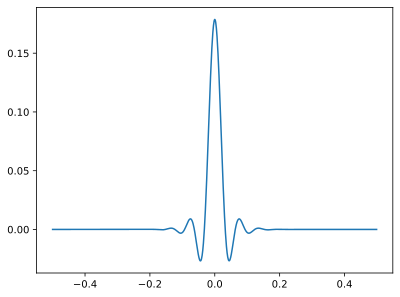

(1000,)
(2, 1000)


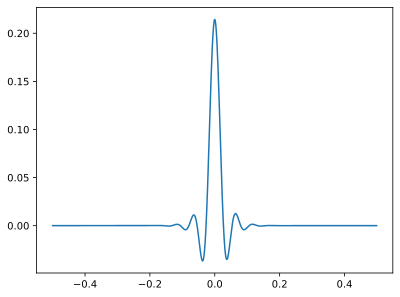

(1000,)
(2, 1000)


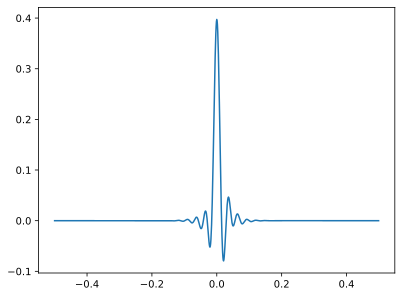

In [219]:
def q4_f():
    for limit in [2,10,30]:
        t,x_t,fs,f_w= generate_signal(1,1e-3,0.5,limit,100)
        t,x,spikes,_ = get_spikes(x_t,0.001)
        t1,x1,spikes1,volts1 = get_spikes(x_t,0.001,e=-1)
        print(spikes.shape)
        spikes = np.vstack((spikes,spikes1))
        print(spikes.shape)
        ts, fs, R, H, h, XHAT, xhat, XP, WXP = compute_optimal_filter(x_t,f_w,spikes)
        plt.plot(ts,h)
        plt.show()

q4_f()

**g) Discussion.** Describe the effects on the time plot of the optimal filter as `limit` increases. Why does this happen?


thinner taller and more oscillation

# Using post-synaptic currents as a filter

**a) Plotting the filter for different $n$.** Plot the normalized $h(t)$ for $n=0$, $1$, and $2$, with $\tau=7\,\mathrm{ms}$.


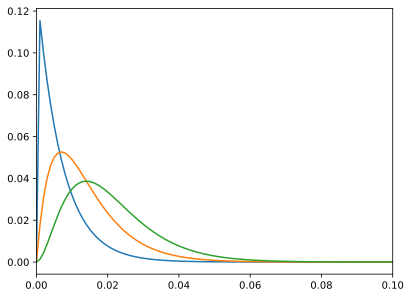

In [235]:
def filter(t,n,tau,dt=1e-3):
    c = np.sum(t**n* np.exp(-t/tau)) # TODO scale dt check how to integrate in numpy
    h =np.where(t>0,c**-1 * t**n * np.exp(-t/tau),0)
    return h
def q5_a():
    t = np.arange(0,1,0.001)
    for i in [0,1,2]:
        plt.plot(t,filter(t,i,0.007))
        plt.xlim(0,0.1)
q5_a()


**b) Discussion.** What two things do you expect increasing $n$ will do to $\hat{x}(t)$?


✍ \<YOUR SOLUTION HERE\>


**c) Plotting the filter for different $\tau$.** Plot the normalized $h(t)$ for $\tau=2\,\mathrm{ms}$, $\tau=5\,\mathrm{ms}$, $\tau=10\,\mathrm{ms}$, $\tau=20\,\mathrm{ms}$ with $n = 0$.


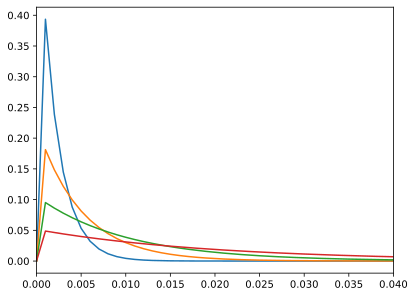

In [221]:
def q5_c():
    t = np.arange(0,1,0.001)
    for tau in [2e-3,5e-3,10e-3,20e-3]:
        plt.plot(t,filter(t,0,tau))
        plt.xlim(0,0.04)
q5_c()


**d) Discussion.** What two things do you expect increasing $\tau$ will do to $\hat{x}(t)$?


✍ \<YOUR SOLUTION HERE\>


**e) Decoding a spike-train using the post-synaptic current filter.** Decode $\hat{x}(t)$ from the spikes generated in question 3c) using an $h(t)$ with $n=0$ and $\tau=7\,\mathrm{ms}$. Do this by generating the spikes, filtering them with $h(t)$, and using that as your activity matrix $A$ to compute your decoders. Plot the time and frequency plots for this $h(t)$. Plot the $x(t)$ signal, the spikes, and the decoded $\hat{x}(t)$ value.


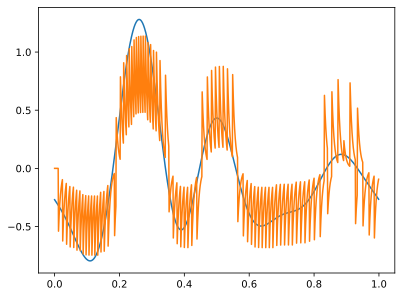

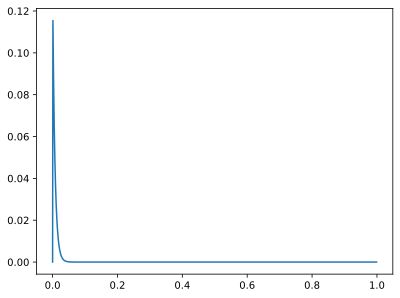

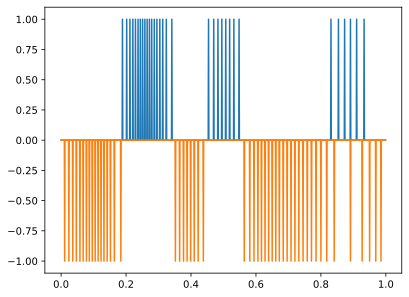

In [232]:
def compute_decoder(A, X):
    D = np.linalg.lstsq(A.T, X.T, rcond=None)[0].T
    return D, A
def convolution(x,h):
    N = len(x)
    M = len(h)
    y = np.zeros(N)
    for i in range(N):
        for j in range(M):
            if i-j >=0:
                y[i] += x[i-j]*h[j]
    return y
def q5_e():
    t,x_t,fs,f_w= generate_signal(1,1e-3,0.5,5,100)
    t,x,spikes,_ = get_spikes(x_t,0.001)
    t1,x1,spikes1,_ = get_spikes(x_t,0.001,e=-1)
    h = filter(np.arange(0,1,0.001),0,0.007)
    A = convolution(spikes,h)
    A_1 = convolution(spikes1,h)
    A_both = np.vstack((A,A_1))
    D, A = compute_decoder(A_both, x_t)
    xhat = np.dot(D,A)
    plt.plot(t,x_t)
    plt.plot(t,xhat)
    plt.show()
    plt.plot(t,h)
    plt.show()
    plt.plot(t,spikes)
    plt.plot(t,-spikes1)
    plt.show()

q5_e()
    






**f) Deocding a spike-train representing a low-frequency signal.** Use the same decoder and $h(t)$ as in part e), but generate a new $x(t)$ with $\mathtt{limit}=2\,\mathrm{Hz}$. Plot the $x(t)$ signal, the spikes, and the decoded $\hat{x}(t)$ value.


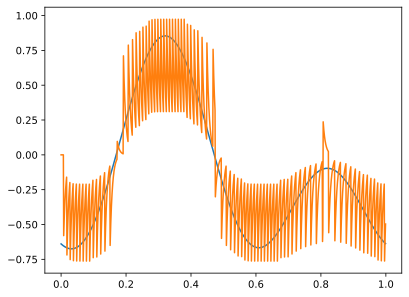

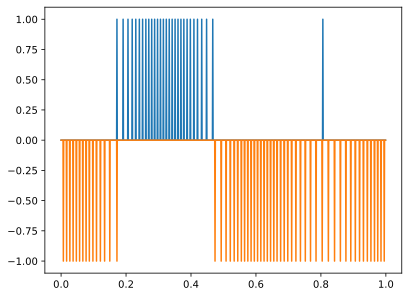

In [223]:
def q5_e():
    t,x_t,fs,f_w= generate_signal(1,1e-3,0.5,2,100)
    t,x,spikes,_ = get_spikes(x_t,0.001)
    t1,x1,spikes1,_ = get_spikes(x_t,0.001,e=-1)
    h = filter(np.arange(0,1,0.001),0,0.007)
    A = convolution(spikes,h)
    A_1 = convolution(spikes1,h)
    A_both = np.vstack((A,A_1))
    D, A = compute_decoder(A_both, x_t)
    xhat = np.dot(D,A)
    plt.plot(t,x_t)
    plt.plot(t,xhat)
    plt.show()
    plt.plot(t,spikes)
    plt.plot(t,-spikes1)
    plt.show()

q5_e()


**g) Discussion.** How do the decodings from e) and f) compare? Explain.


✍ \<YOUR SOLUTION HERE\>
